# Tag clustering: 

This notebook focuses on how to use UMAP to separate the tags with similar meaning and perform a HDBSACAN clustering on top a UMAP generated matrix with 10 elements. And finally save the clustering result to a “cluseter_1.csv” for future use. 


In [1]:
from utils import *
import utils
import importlib
from collections import defaultdict
importlib.reload(utils)
%matplotlib inline 
import time
current_dir = os.getcwd()
print ('current folder: ',current_dir)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import get_file
import bcolz
from sklearn.cluster  import KMeans
from scipy.cluster.vq import kmeans
from MulticoreTSNE import MulticoreTSNE as TSNE
from bs4 import BeautifulSoup
import re
import multiprocessing ## great tool to keep track of loop process
from itertools import product

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
from sklearn.model_selection import train_test_split
from numpy.random import random, permutation, randn, normal, uniform, choice
import sklearn.manifold
from hdbscan import HDBSCAN
from umap import UMAP

country_name= pd.read_html('https://gist.github.com/kalinchernev/486393efcca01623b18d')[0][1].tolist()
def load_array(fname):
    return bcolz.open(fname)[:]

plotly  2.4.1


/home/sohrab/anaconda3/lib/python3.5/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



plotly  2.4.1


Using TensorFlow backend.


current folder:  /home/sohrab/Index_ventures


/home/sohrab/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py:766: DeprecationWarning:

builtin type EagerTensor has no __module__ attribute

/home/sohrab/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() instead

/home/sohrab/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() instead

/home/sohrab/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() instead

/home/sohrab/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() instead



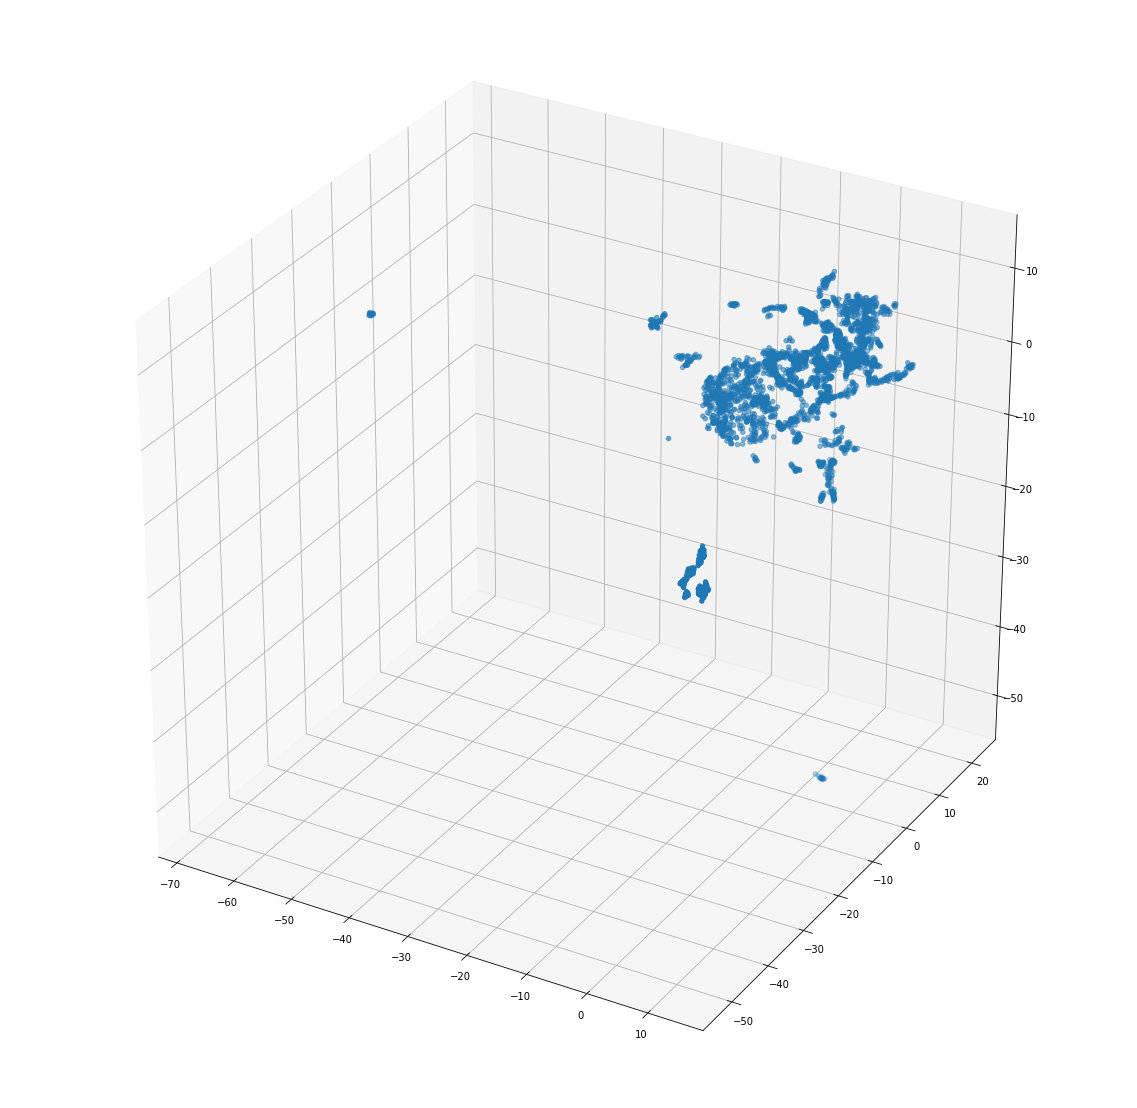

In [2]:
df_g1 = pd.read_csv('tag_glove_word2vec_ver2.csv')
df_g1= df_g1.set_index('Unnamed: 0',inplace=False)

umapper = UMAP(n_neighbors=10, 
               n_components = 10, 
               min_dist=0.000001,
               local_connectivity = 40, 
               negative_sample_rate = 500)
df_g1['tsne_x'],df_g1['tsne_y'], df_g1['tsne_z'],df_g1['tsne_xx'],df_g1['tsne_yx'],df_g1['tsne_zx'],df_g1['tsne_xxx'],df_g1['tsne_yxx'], df_g1['tsne_zxx'], df_g1['tsne_xyx']= umapper.fit_transform(df_g1).T

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_g1['tsne_x'],df_g1['tsne_y'],df_g1['tsne_z'])

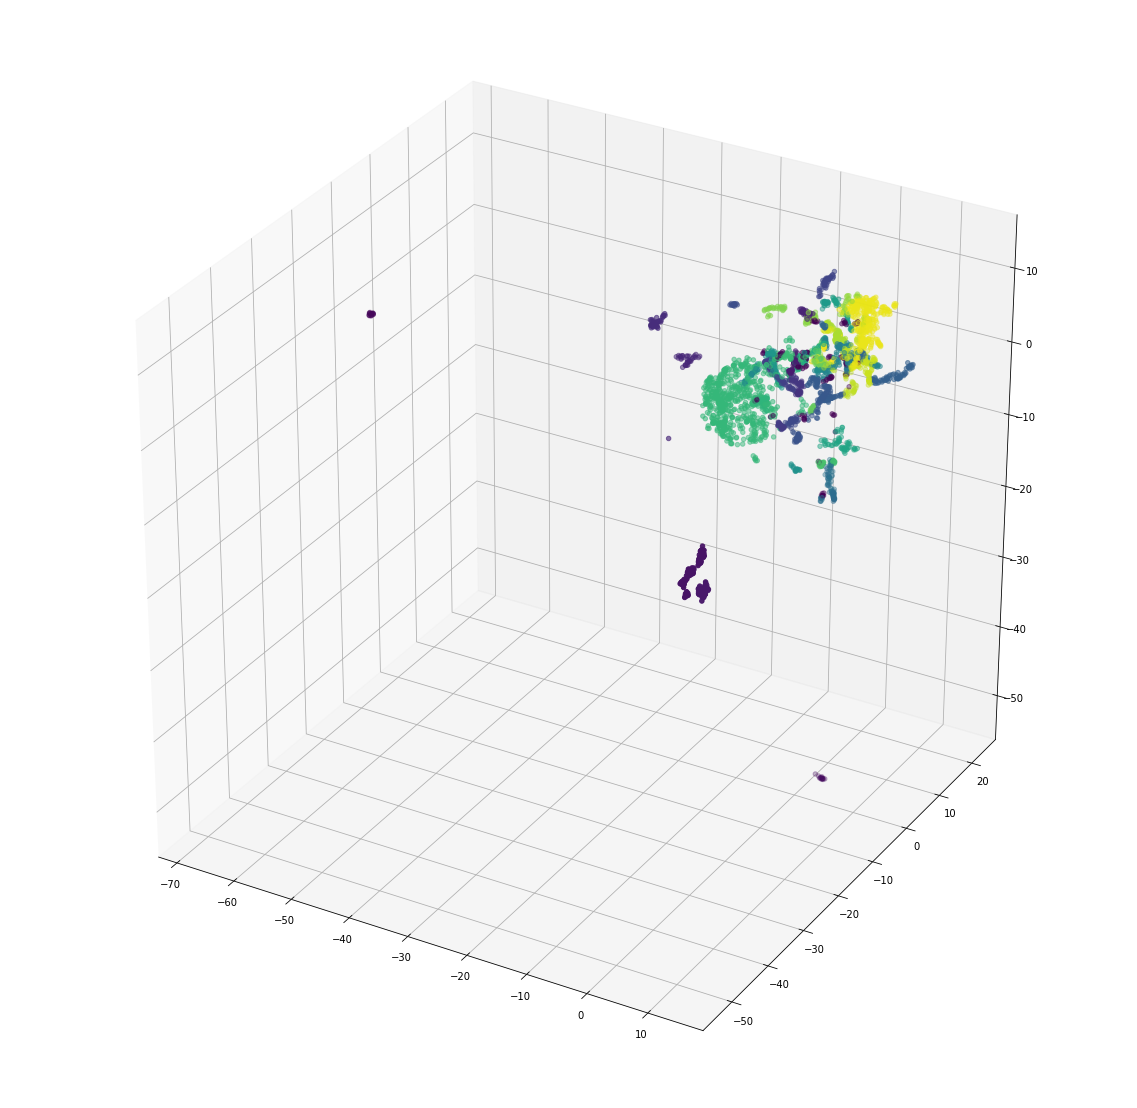

In [3]:
df1 = df_g1.copy()
db = HDBSCAN(min_cluster_size=10)
df1['dbscan']= db.fit_predict(df1.iloc[:,300:])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['tsne_x'],df1['tsne_y'],df1['tsne_z'], c = df1.dbscan)

In [4]:
max(df1['dbscan'])

62

In [5]:
iplot(df1.dbscan.value_counts().iplot(asFigure=True,
                 kind='bar',
                 xTitle='',
                 yTitle='',
                 title='UMAP 10'))

In [6]:
df0 = df1.copy()
df_cluster_1 = df0.reset_index()

df_cluster_1  = df_cluster_1[['Unnamed: 0', 'dbscan']]
df_cluster_1 = df_cluster_1.reset_index()

df_cluster_1.head()

,index,Unnamed: 0,dbscan
0,0,software,56
1,1,mobile,21
2,2,health,6
3,3,social,60
4,4,media,12


In [7]:
# df_cluster_1.to_csv('cluseter_1.csv')